Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train")
data_dir_test = pathlib.Path('E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Test')

In [4]:
data_dir_train

WindowsPath('E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
input_shape = (img_height, img_width, 3)

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_width,img_height),
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='int'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_width,img_height),
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='int'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

In [12]:
val_ds.element_spec

(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

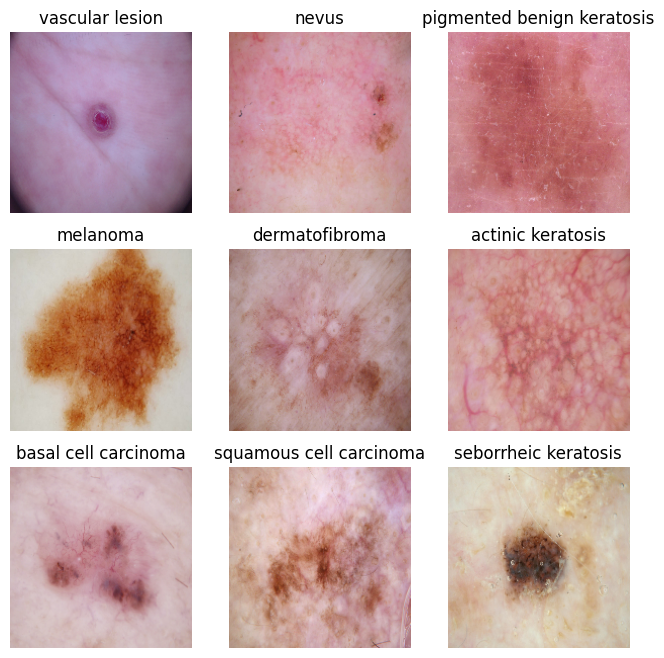

In [13]:
class_instances = {}

for images, labels in train_ds:
    for img, label in zip(images, labels):
        class_label = class_names[label.numpy()]
        if class_label not in class_instances:
            class_instances[class_label] = img
        if len(class_instances) == len(class_names):
            break
    if len(class_instances) == len(class_names):
        break

plt.figure(figsize=(8, 8))
for i, (class_name, image) in enumerate(class_instances.items()):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(class_name)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [27]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
### Your code goes here

model = Sequential()

model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Rescaling(scale=1./255, offset=0.0))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(9, activation='softmax')) 

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                    

### Train the model

In [17]:
epochs = 5
history = model.fit(
      train_ds,
      steps_per_epoch=len(train_ds),
      validation_data=val_ds,
      validation_steps=len(val_ds),
      epochs=epochs
)

Epoch 1/5
56/56 [==============================] - 64s 447ms/step - loss: 2.1889 - accuracy: 0.2450 - val_loss: 1.9539 - val_accuracy: 0.2841
Epoch 2/5
56/56 [==============================] - 18s 295ms/step - loss: 1.6621 - accuracy: 0.4090 - val_loss: 1.4980 - val_accuracy: 0.4698
Epoch 3/5
56/56 [==============================] - 18s 313ms/step - loss: 1.4027 - accuracy: 0.5006 - val_loss: 1.3949 - val_accuracy: 0.4989
Epoch 4/5
56/56 [==============================] - 100s 2s/step - loss: 1.3151 - accuracy: 0.5363 - val_loss: 1.4260 - val_accuracy: 0.4877
Epoch 5/5
56/56 [==============================] - 12s 141ms/step - loss: 1.2081 - accuracy: 0.5636 - val_loss: 1.6315 - val_accuracy: 0.4899


### Visualizing training results

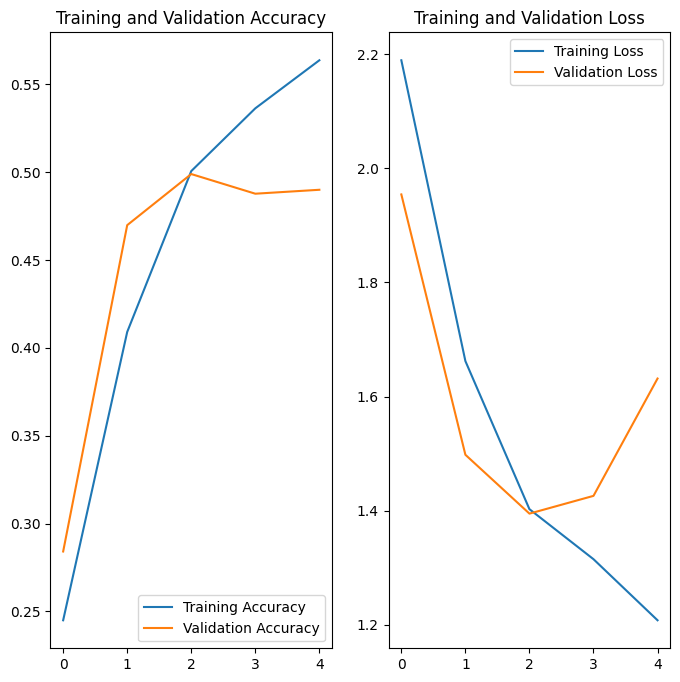

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

- Yes there is a evidence that model is overfitting on the graph loss suddenly increasing in oppsite direction on the training loss 
- When train the model with high epoc model trained and overfitting without using any dropout and audumentation methods

In [19]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_width,img_height),
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='int',
    shuffle=True
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [20]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here



history_1 = Sequential()

history_1.add(keras.layers.Input(shape=input_shape))
history_1.add(keras.layers.Rescaling(scale=1./255, offset=0.0))
history_1.add(keras.layers.RandomFlip('horizontal_and_vertical'))
history_1.add(keras.layers.RandomZoom(
    height_factor=(0.2, 0.3),
    width_factor=(0.2, 0.3),
    seed=123
))
history_1.add(keras.layers.RandomRotation(0.2))
history_1.add(keras.layers.ZeroPadding2D(padding=(1,1)))
history_1.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
history_1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
history_1.add(keras.layers.Dropout(0.2, seed=123))
history_1.add(keras.layers.ZeroPadding2D(padding=(1,1)))
history_1.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
history_1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
history_1.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
history_1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
history_1.add(keras.layers.Flatten())
history_1.add(keras.layers.Dense(128, activation='relu')) 
history_1.add(keras.layers.Dense(9, activation='softmax')) 

In [24]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

history_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])


history_1.summary()


epochs = 25
history1 = history_1.fit(
      train_ds,
      steps_per_epoch=len(train_ds),
      validation_data=val_ds,
      validation_steps=len(val_ds),
      epochs=epochs
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 zero_padding2d (ZeroPadding  (None, 182, 182, 3)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)     

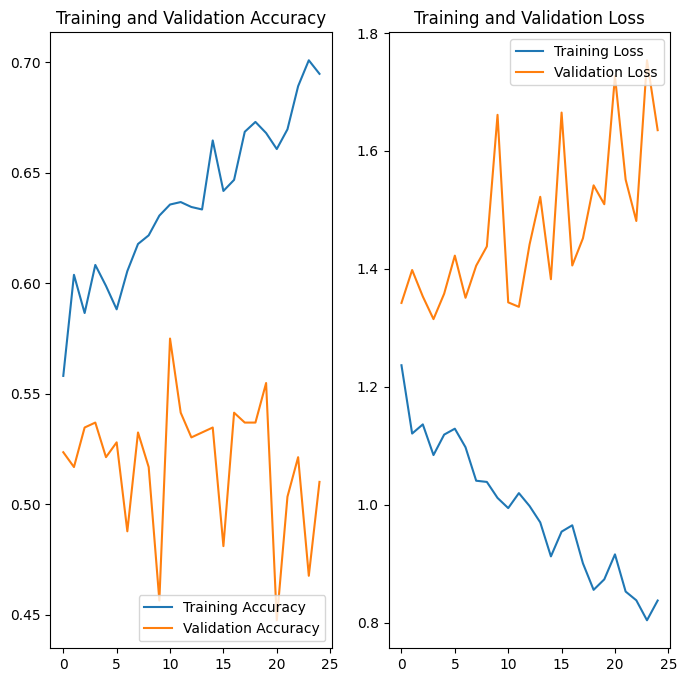

In [25]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes her
history_2 = Sequential()

history_2.add(keras.layers.Input(shape=input_shape))
history_2.add(keras.layers.Rescaling(scale=1./255, offset=0.0))
history_2.add(keras.layers.RandomFlip('horizontal_and_vertical'))
history_2.add(keras.layers.RandomZoom(
    height_factor=(0.2, 0.3),
    width_factor=(0.2, 0.3),
    seed=123
))
history_2.add(keras.layers.RandomRotation(0.2))
history_2.add(keras.layers.ZeroPadding2D(padding=(1,1)))
history_2.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
history_2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
history_2.add(keras.layers.Dropout(0.2, seed=123))
history_2.add(keras.layers.ZeroPadding2D(padding=(1,1)))
history_2.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
history_2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
history_2.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
history_2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
history_2.add(keras.layers.Flatten())
history_2.add(keras.layers.Dense(128, activation='relu')) 
history_2.add(keras.layers.Dense(9, activation='softmax')) e



### Compiling the model

In [ ]:
## Your code goes here
history_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])


history_2.summary()

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history2 = history_2.fit(
      train_ds,
      steps_per_epoch=len(train_ds),
      validation_data=val_ds,
      validation_steps=len(val_ds),
      epochs=epochs
)

### Visualizing the results

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- Model performance improved compare to the first model but still the overfit problem exists.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [26]:
## Your code goes here.
from collections import Counter


# Count images per class
class_counts = {}
for class_name in os.listdir(data_dir_train):
    class_path = os.path.join(data_dir_train, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

actinic keratosis: 114
basal cell carcinoma: 376
dermatofibroma: 95
melanoma: 438
nevus: 357
pigmented benign keratosis: 462
seborrheic keratosis: 77
squamous cell carcinoma: 181
vascular lesion: 139


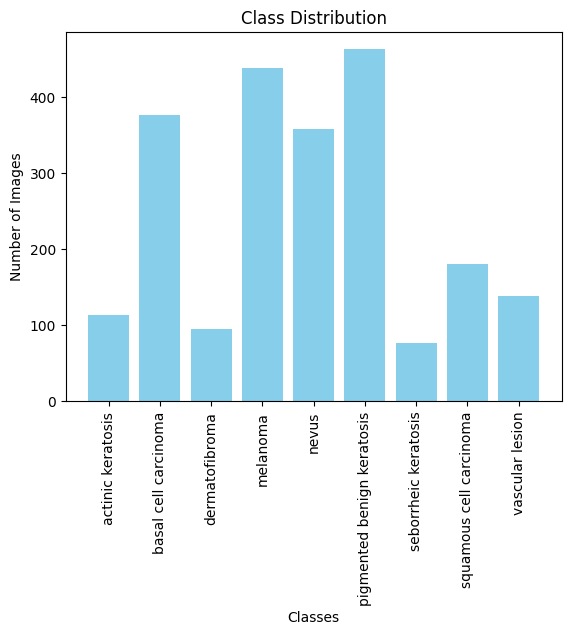

In [28]:
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Plot class distribution
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
--> **Seborrheic Keratosis**
#### - Which classes dominate the data in terms proportionate number of samples?
--> **pigmented benign keratosis**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [35]:
path_to_training_dataset= 'E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x228336461C0>: 100%|█| 500/500 [00:02<00:


Initialised with 376 image(s) found.
Output directory set to E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x228336A49D0>: 100%|█| 500/500 [00:02<00:00, 190.70 Samples


Initialised with 95 image(s) found.
Output directory set to E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x228323ECEE0>: 100%|█| 500/500 [00:02<00:


Initialised with 438 image(s) found.
Output directory set to E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x228337AC460>: 100%|█| 500/500 [00:10<00


Initialised with 357 image(s) found.
Output directory set to E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x2283374B790>: 100%|█| 500/500 [00:09<00:


Initialised with 462 image(s) found.
Output directory set to E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22833637640>: 100%|█| 500/500 [00:02<00:00, 169.23 Samples


Initialised with 77 image(s) found.
Output directory set to E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22833726E50>: 100%|█| 500/500 [00:05<00:00, 98.03 Samples


Initialised with 181 image(s) found.
Output directory set to E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x228325FE340>: 100%|█| 500/500 [00:01<00:00, 251.72 Samples


Initialised with 139 image(s) found.
Output directory set to E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22833695AF0>: 100%|█| 500/500 [00:02<00:00, 225.79 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [36]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [39]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['E:\\UPGRAD\\IIIT-B Machine learning and AI\\Jupyter_workout\\Case Study Workout\\15_12_2024_melnoma_detection\\input\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_01a14237-5d8c-4dfa-96b0-8929b8eae705.jpg',
 'E:\\UPGRAD\\IIIT-B Machine learning and AI\\Jupyter_workout\\Case Study Workout\\15_12_2024_melnoma_detection\\input\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_05c69291-0bce-4e7c-aa5b-dfc45c6dd66d.jpg',
 'E:\\UPGRAD\\IIIT-B Machine learning and AI\\Jupyter_workout\\Case Study Workout\\15_12_2024_melnoma_detection\\input\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_42e5faf8-06c0-43a2-8f45-1350b52c7d75.jpg',
 'E:\\UPGRAD\\IIIT-B Machine learning and AI\\Jupyter_workout\\Case Study Workout\\15_12_2024_melnoma_detection\\input\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_531f38d1-22c5-495f-a648-fdc4417de90a.jpg',
 'E:\\UPGRAD\\IIIT-B Machine learnin

In [40]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [47]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [58]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

new_df = df2.copy()

In [59]:
new_df['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [60]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [62]:
data_dir_train="E:/UPGRAD/IIIT-B Machine learning and AI/Jupyter_workout/Case Study Workout/15_12_2024_melnoma_detection/input/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [63]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [78]:
## your code goes here

history_3 = Sequential()

history_3.add(keras.layers.Input(shape=input_shape))
history_3.add(keras.layers.Rescaling(scale=1./255, offset=0.0))
history_3.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
history_3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
history_3.add(keras.layers.Dropout(0.2, seed=123))
history_3.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
history_3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
history_3.add(keras.layers.Dropout(0.2, seed=123))
history_3.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
history_3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
history_3.add(keras.layers.Flatten())
history_3.add(keras.layers.Dense(9, activation='softmax')) 

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [79]:
## your code goes here
history_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])


history_3.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                 

#### **Todo:**  Train your model

In [80]:
epochs = 50
## Your code goes here, use 50 epochs.
history3 = history_3.fit(
      train_ds,
      steps_per_epoch=len(train_ds),
      validation_data=val_ds,
      validation_steps=len(val_ds),
      epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 10s 50ms/step - loss: 1.9172 - accuracy: 0.2784 - val_loss: 1.6922 - val_accuracy: 0.4001
Epoch 2/50
169/169 [==============================] - 8s 49ms/step - loss: 1.4800 - accuracy: 0.4468 - val_loss: 1.4140 - val_accuracy: 0.4751
Epoch 3/50
169/169 [==============================] - 9s 49ms/step - loss: 1.3367 - accuracy: 0.5104 - val_loss: 1.3015 - val_accuracy: 0.5330
Epoch 4/50
169/169 [==============================] - 9s 52ms/step - loss: 1.1707 - accuracy: 0.5725 - val_loss: 1.2829 - val_accuracy: 0.5382
Epoch 5/50
169/169 [==============================] - 9s 52ms/step - loss: 1.0665 - accuracy: 0.6135 - val_loss: 1.1392 - val_accuracy: 0.5627
Epoch 6/50
169/169 [==============================] - 9s 54ms/step - loss: 0.9554 - accuracy: 0.6560 - val_loss: 1.1319 - val_accuracy: 0.6050
Epoch 7/50
169/169 [==============================] - 10s 57ms/step - loss: 0.8833 - accuracy: 0.6829 - val_loss: 1.0442 - val_accuracy: 0.63

#### **Todo:**  Visualize the model results

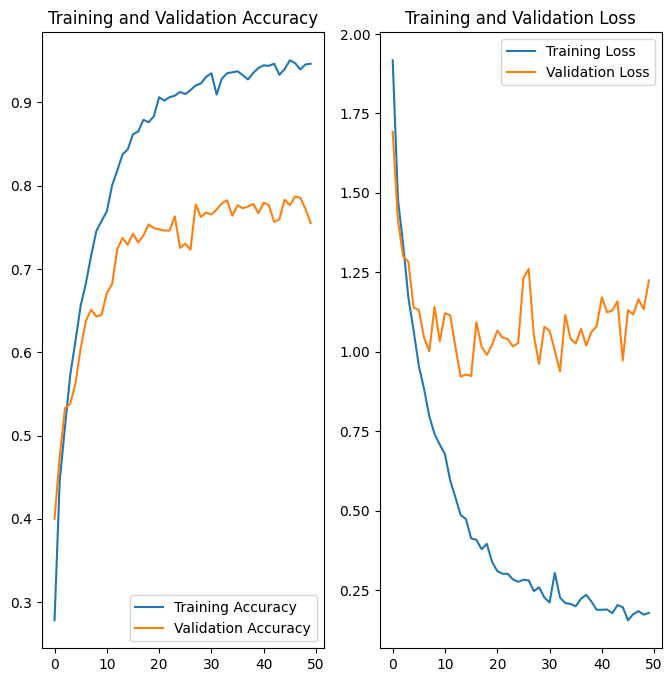

In [81]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Accuracy for the model increased while using the class imbalance but still there is some gap between the train and validation accuracy which shows the overfitting. But tuning the nureon and layer will give better result for overfitting problem